In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d sophatvathana/casia-dataset

Dataset URL: https://www.kaggle.com/datasets/sophatvathana/casia-dataset
License(s): unknown
100% 5.21G/5.22G [01:03<00:00, 147MB/s]
100% 5.22G/5.22G [01:03<00:00, 88.4MB/s]


In [6]:
!tar -xf casia-dataset.zip

tar: This does not look like a tar archive
tar: Skipping to next header
tar: Archive contains ‘>2\314P3\314\a\326ɑE\232’ where numeric off_t value expected
tar: Archive contains ‘(\025q\bX\037\002\366\212H\025J’ where numeric off_t value expected
tar: Archive contains ‘\036\030T\2759e\005o\246\214\233\320’ where numeric off_t value expected
tar: Exiting with failure status due to previous errors


In [6]:
!pwd

/content


In [7]:
!unzip -q casia-dataset.zip -d /content/casia

In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [10]:
train_generator = train_datagen.flow_from_directory(
    '/content/casia/CASIA1',  # Path to the dataset directory
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,  # Number of images to yield per batch
    class_mode='binary',  # For binary classification
    subset='training'  # Use this for training
)

Found 1377 images belonging to 2 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
    '/content/casia/CASIA1',  # Path to the dataset directory
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,  # Number of images to yield per batch
    class_mode='binary',  # For binary classification
    subset='validation'  # Use this for validation
)

Found 344 images belonging to 2 classes.


In [12]:
model =VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=x)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [14]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.keras',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=callbacks ,verbose=2
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.86654, saving model to mymodel.keras
43/43 - 26s - 613ms/step - accuracy: 0.5190 - loss: 0.8153 - val_accuracy: 0.4187 - val_loss: 0.8665
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.86654 to 0.86099, saving model to mymodel.keras
43/43 - 11s - 261ms/step - accuracy: 0.4688 - loss: 0.8799 - val_accuracy: 0.5000 - val_loss: 0.8610
Epoch 3/10

Epoch 3: val_loss did not improve from 0.86099
43/43 - 7s - 173ms/step - accuracy: 0.6580 - loss: 0.6420 - val_accuracy: 0.2969 - val_loss: 1.0153
Epoch 4/10

Epoch 4: val_loss did not improve from 0.86099
43/43 - 0s - 6ms/step - accuracy: 0.5938 - loss: 0.6291 - val_accuracy: 0.3750 - val_loss: 0.9432
Epoch 5/10

Epoch 5: val_loss did not improve from 0.86099
43/43 - 10s - 233ms/step - accuracy: 0.7026 - loss: 0.5946 - val_accuracy: 0.3031 - val_loss: 1.0998
Epoch 6/10

Epoch 6: val_loss did not improve from 0.86099
43/43 - 0s - 6ms/step - accuracy: 0.7188 - loss: 0.5091 - val_accuracy: 0.3333 - val_loss: 1.2173
Epoch 7/10

Epoch 7: val_loss did not improve from 0.86099
43/43 - 10s - 239ms/step - accuracy: 0.7442 - loss: 0.5476 - val_accuracy: 0.3063 - val_loss: 1.1354
Epoch 8/10

Epoch 8: va

In [15]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.3540 - loss: 1.2461
Validation Loss: 1.2139196395874023
Validation Accuracy: 0.3633720874786377


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


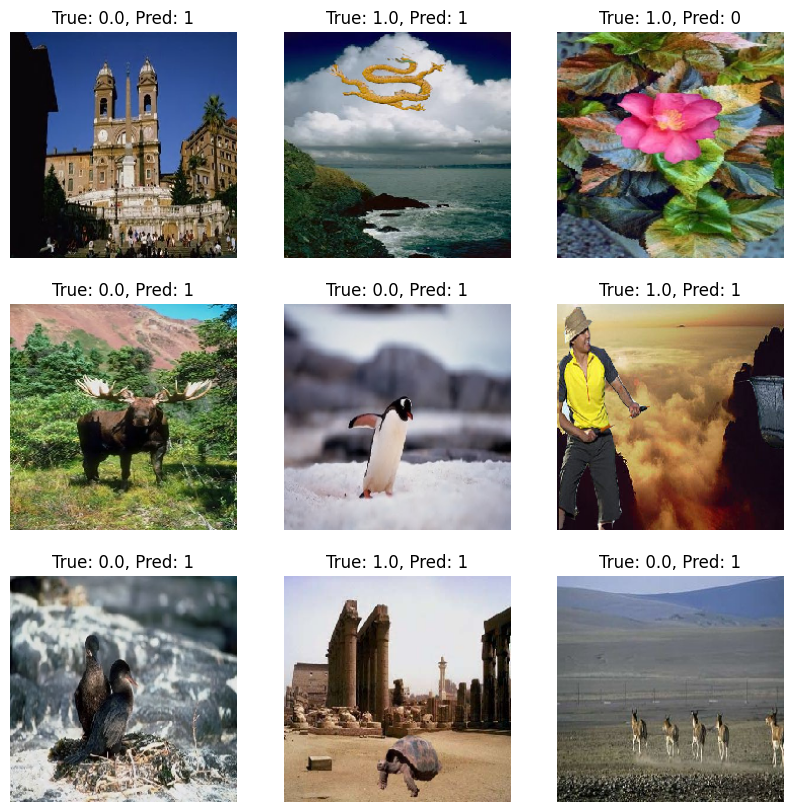

In [16]:
import matplotlib.pyplot as plt
import numpy as np


images, labels = next(validation_generator)


predictions = model.predict(images)
predicted_labels = (predictions > 0.5).astype(int)


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {labels[i]}, Pred: {predicted_labels[i][0]}")
    plt.axis('off')
plt.show()